In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import scipy.spatial.distance as dt
import scipy.stats as stats

In [2]:
group_means = np.array([[-6.0, -1.0],
                        [-3.0, +2.0],
                        [+3.0, +2.0],
                        [+6.0, -1.0]])

group_covariances = np.array([[[+0.4, +0.0],
                               [+0.0, +4.0]],
                              [[+2.4, -2.0],
                               [-2.0, +2.4]],
                              [[+2.4, +2.0],
                               [+2.0, +2.4]],
                              [[+0.4, +0.0],
                               [+0.0, +4.0]]])

In [3]:
# read data into memory
data_set = np.genfromtxt("hw05_data_set.csv", delimiter = ",")

# get X values
X = data_set[:, [0, 1]]

# set number of clusters
K = 4


In [4]:
centroids = np.genfromtxt("hw05_initial_centroids.csv", delimiter = ",")
print(centroids)

[[-3.84433     0.00672851]
 [ 0.0247336  -3.95459   ]
 [ 4.01359    -0.0282216 ]
 [ 0.161958    4.06549   ]]


In [5]:
D = dt.cdist(centroids,X, 'euclidean')
memberships = np.argmin(D, axis = 0)
print(X.shape[0])

1000


In [6]:
# STEP 2
# should return initial parameter estimates
# as described in the homework description
def initialize_parameters(X, K):
    # your implementation starts below
    N = X.shape[0]
    centroids = np.genfromtxt("hw05_initial_centroids.csv", delimiter = ",")
    D = dt.cdist(centroids,X, 'euclidean')
    memberships = np.argmin(D, axis = 0)

    means = centroids
    #covariances = np.vstack([np.cov(X[memberships == k, :].T) for k in range(K)])
    covariances = [np.cov(X[memberships == k, :].T) for k in range(K)]
    covariances = np.stack(covariances, axis=0)
    priors = np.hstack([((X[memberships == k, :].shape[0])/N) for k in range(K)])

    # your implementation ends above
    return(means, covariances, priors)

means, covariances, priors = initialize_parameters(X, K)


In [7]:
print(means)
print(covariances)
print(priors)




[[-3.84433     0.00672851]
 [ 0.0247336  -3.95459   ]
 [ 4.01359    -0.0282216 ]
 [ 0.161958    4.06549   ]]
[[[ 3.27837634  1.35613577]
  [ 1.35613577  5.39670168]]

 [[ 8.45512587 -0.90231194]
  [-0.90231194  6.25265747]]

 [[ 2.77239237 -1.36435854]
  [-1.36435854  5.43241012]]

 [[ 6.70006673  0.85493949]
  [ 0.85493949  1.72491845]]]
[0.466 0.019 0.444 0.071]


In [17]:
# STEP 3
# should return final parameter estimates of
# EM clustering algorithm
def em_clustering_algorithm(X, K, means, covariances, priors):
    # your implementation starts below
    
    iteration = 0
    N = X.shape[0]
    probs = np.zeros((N, K))
    
    while (iteration != 100):
        
        for k in range(K):
            probs[:, k] = priors[k] * stats.multivariate_normal.pdf(X, means[k], covariances[k])
        
        probs = probs / probs.sum(axis=1, keepdims=True)
        
        cluster_count = probs.sum(axis=0)
        
        for k in range(K):
            
            means[k] = (X * probs[:, k, np.newaxis]).sum(axis=0) / cluster_count[k]
            covariances[k] = (probs[:, k, np.newaxis] * (X - means[k])).T @ (X - means[k]) / cluster_count[k]
            priors[k] = cluster_count[k] / N
    
        assignments = np.argmax(probs, axis=1)
            
        iteration = iteration + 1
    
    # your implementation ends above
    return(means, covariances, priors, assignments,probs)

means, covariances, priors, assignments ,probs  = em_clustering_algorithm(X, K, means, covariances, priors)
#print(means)
#print(priors)
print(probs)

[[9.98041344e-001 1.95865573e-003 1.38540853e-071 3.46381733e-011]
 [9.99999998e-001 5.37407005e-029 3.41043286e-100 1.72387817e-009]
 [1.00000000e+000 5.01012782e-012 8.36664540e-085 2.47181315e-010]
 ...
 [8.91165172e-062 5.00119161e-009 9.98844033e-001 1.15596197e-003]
 [8.39450268e-083 8.08889731e-008 9.99999919e-001 3.38848992e-017]
 [4.17238555e-072 5.07006925e-012 9.99992104e-001 7.89604007e-006]]


In [110]:
# STEP 4
# should draw EM clustering results as described
# in the homework description
def draw_clustering_results(X, K, group_means, group_covariances, means, covariances, assignments):
    # your implementation starts below
    
    
    
    colors = ['red', 'blue','green',  'purple']

    plt.figure(figsize=(12, 10))

   
    for k in range(K):
        cluster = X[assignments == k]
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[k])
    
    
    for k in range(K):
        

        x_first, y_first = np.mgrid[group_means[k][0]-3*np.sqrt(group_covariances[k][0,0]):group_means[k][0]+3*np.sqrt(group_covariances[k][0,0]):.01, group_means[k][1]-3*np.sqrt(group_covariances[k][1,1]):group_means[k][1]+3*np.sqrt(group_covariances[k][1,1]):.01]
        distribution_first = stats.multivariate_normal(group_means[k], group_covariances[k])
       
       
        x_second, y_second = np.mgrid[means[k][0]-3*np.sqrt(covariances[k][0,0]):means[k][0]+3*np.sqrt(covariances[k][0,0]):.01, means[k][1]-3*np.sqrt(covariances[k][1,1]):means[k][1]+3*np.sqrt(covariances[k][1,1]):.01]
        distribution_second = stats.multivariate_normal(means[k], covariances[k])
        
        plt.contour(x_first, y_first, distribution_first.pdf(np.dstack((x_first, y_first))), levels=[0.01], colors='black', linestyles='dashed')
        plt.contour(x_second, y_second, distribution_second.pdf(np.dstack((x_second, y_second))), levels=[0.01], colors=colors[k], linestyles='solid')


    
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()
    # your implementation ends above
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


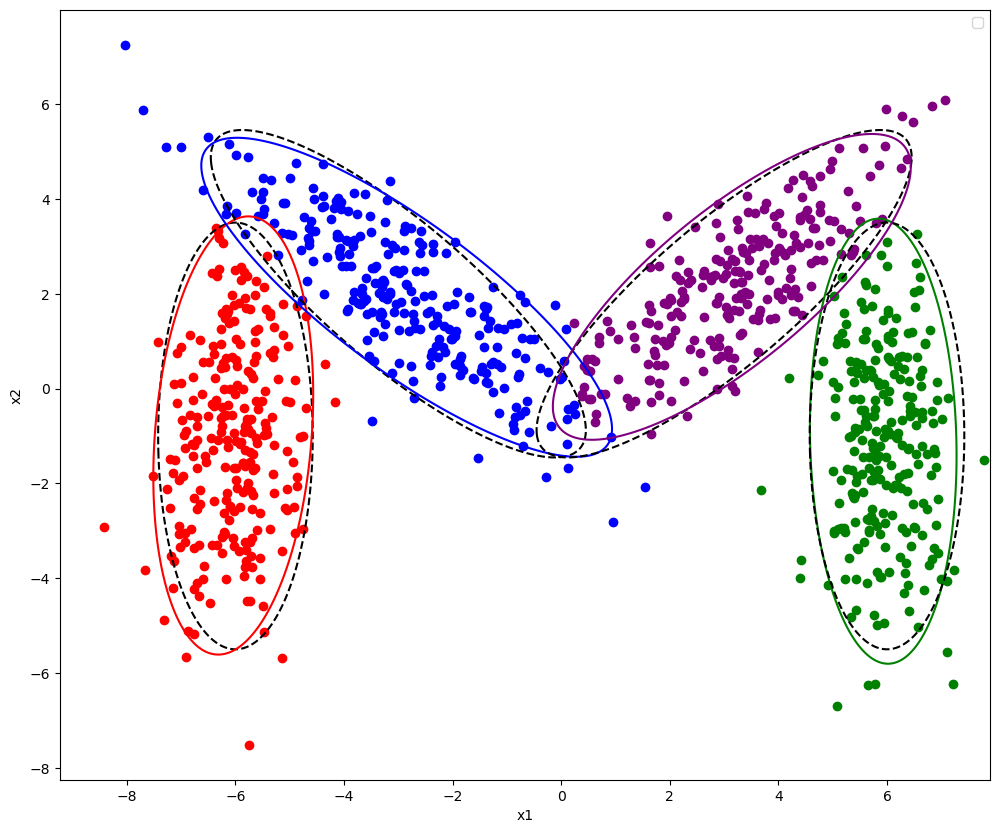

In [111]:
draw_clustering_results(X, K, group_means, group_covariances, means, covariances, assignments)